In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Optional: Set the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)



TensorFlow version: 2.15.0


In [2]:
# Define the path to the dataset
data_dir = 'train_images'

# Define image size and batch size
image_size = (150, 150)
batch_size = 32

# Create an ImageDataGenerator for data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Use 20% of the data for validation
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Create validation data generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Print class indices to see the mapping of class names to labels
print("Class indices:", train_generator.class_indices)


Found 8330 images belonging to 10 classes.
Found 2077 images belonging to 10 classes.
Class indices: {'bacterial_leaf_blight': 0, 'bacterial_leaf_streak': 1, 'bacterial_panicle_blight': 2, 'blast': 3, 'brown_spot': 4, 'dead_heart': 5, 'downy_mildew': 6, 'hispa': 7, 'normal': 8, 'tungro': 9}


Found 8330 images belonging to 10 classes.


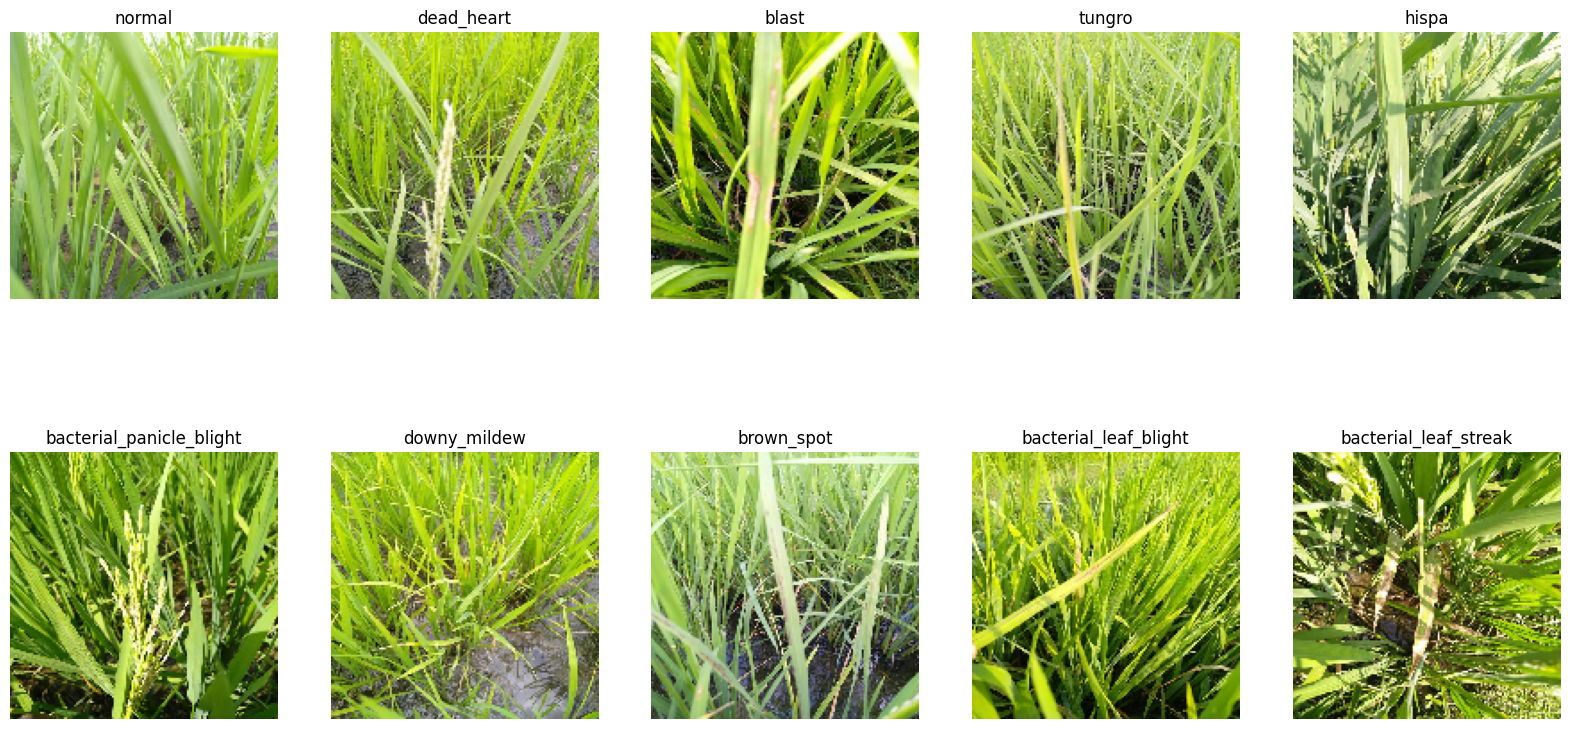

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display one image per class
def display_images_per_class(data_generator, num_classes, images_per_row=5):
    class_names = list(data_generator.class_indices.keys())
    images_shown = {class_name: False for class_name in class_names}
    
    plt.figure(figsize=(20, 10))  # Adjust figure size based on number of rows

    for _ in range(num_classes * 10):  # Iterate enough times to cover all classes
        img_batch, label_batch = next(data_generator)
        for img, label in zip(img_batch, label_batch):
            class_name = class_names[np.argmax(label)]
            if not images_shown[class_name]:
                index = sum(images_shown.values())
                plt.subplot((num_classes + images_per_row - 1) // images_per_row, images_per_row, index + 1)
                plt.imshow(img)
                plt.title(class_name)
                plt.axis('off')
                images_shown[class_name] = True
                if all(images_shown.values()):
                    break
        if all(images_shown.values()):
            break

    plt.show()

# Define the path to the dataset
data_dir = 'train_images'

# Define image size
image_size = (150, 150)

# Create a data generator for displaying images
display_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create a data generator
display_generator = display_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=1,
    class_mode='categorical',
    subset='training'
)

# Display one image per class
num_classes = 10  # Adjust this based on the number of classes you have
display_images_per_class(display_generator, num_classes, images_per_row=5)


In [3]:
data_csv=pd.read_csv('train.csv')
data_csv.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


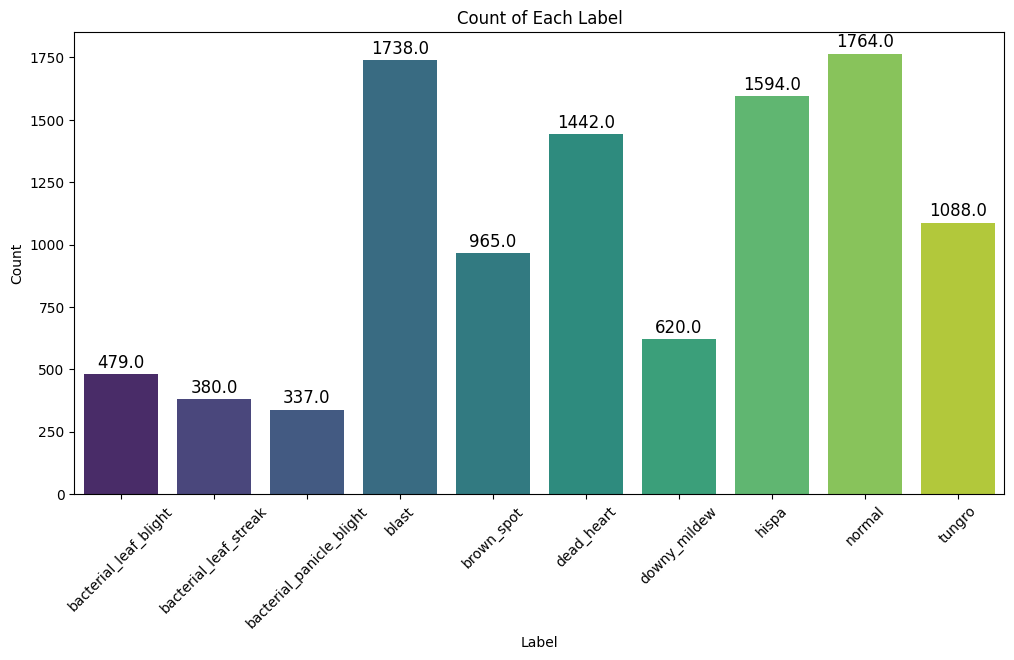

In [11]:
# Create a count plot for the 'label' column
import seaborn as sns 

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data_csv, x='label', palette='viridis')

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Update the number of classes here
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=25,  # Adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/25


260/260 [==============================] - 449s 2s/step - loss: 2.0532 - accuracy: 0.2611 - val_loss: 1.9006 - val_accuracy: 0.3359
Epoch 2/25
260/260 [==============================] - 378s 1s/step - loss: 1.8467 - accuracy: 0.3572 - val_loss: 1.7651 - val_accuracy: 0.3921
Epoch 3/25
260/260 [==============================] - 397s 2s/step - loss: 1.7020 - accuracy: 0.4146 - val_loss: 1.6277 - val_accuracy: 0.4302
Epoch 4/25
260/260 [==============================] - 154s 588ms/step - loss: 1.5637 - accuracy: 0.4613 - val_loss: 1.4708 - val_accuracy: 0.4819
Epoch 5/25
260/260 [==============================] - 140s 539ms/step - loss: 1.4408 - accuracy: 0.5089 - val_loss: 1.3732 - val_accuracy: 0.5449
Epoch 6/25
260/260 [==============================] - 157s 602ms/step - loss: 1.3343 - accuracy: 0.5510 - val_loss: 1.2658 - val_accuracy: 0.5791
Epoch 7/25
260/260 [==============================] - 150s 578ms/step - loss: 1.2323 - accuracy: 0.5891 - val_loss: 1.1952 - val_ac

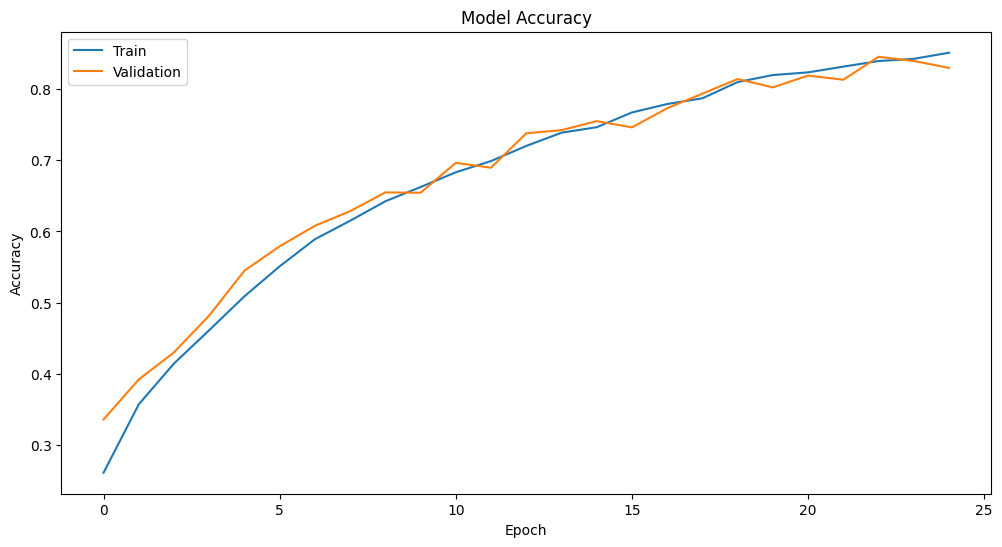

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()



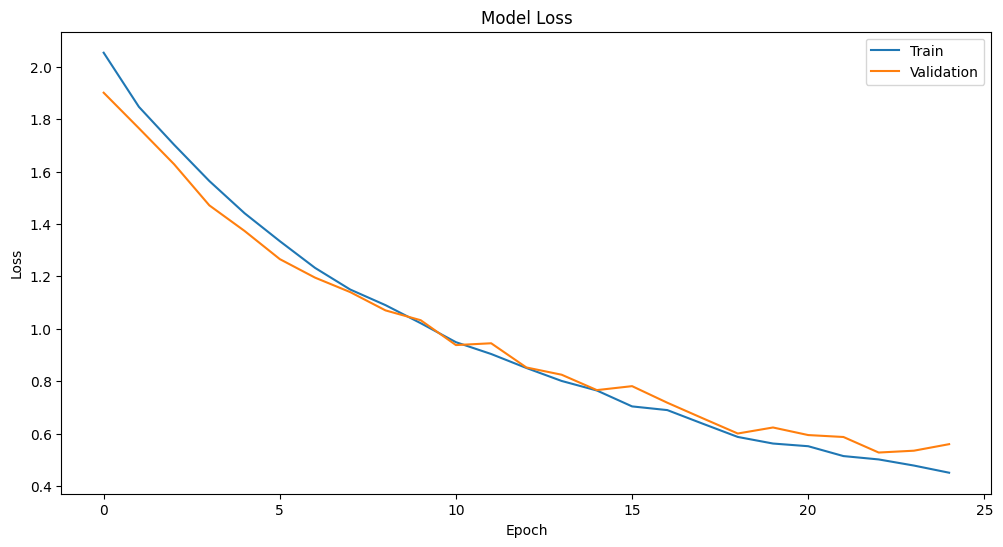

In [15]:

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [16]:
model.save('model82.h5')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


65/65 [==============================] - 17s 252ms/step


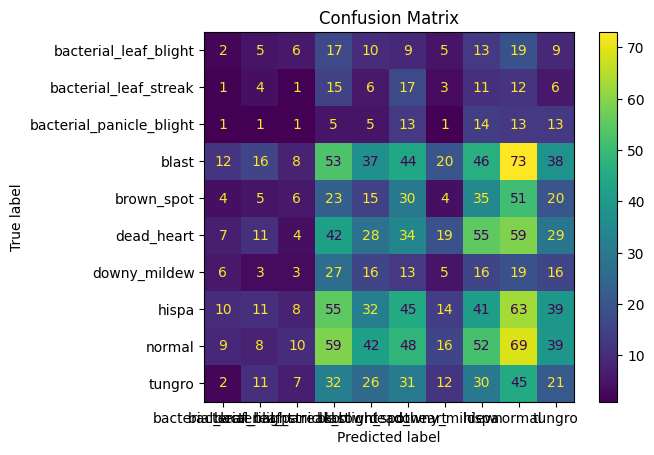

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get predictions from the model
y_pred = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(model, img_path, target_size=(150, 150)):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale image

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_labels = list(validation_generator.class_indices.keys())
    
    # Get predicted label
    predicted_label = class_labels[predicted_class[0]]
    
    # Print prediction result
    print(f"Predicted Label: {predicted_label}")

    # Optionally: Return the predicted label and probabilities
    return predicted_label, predictions

# Example usage
img_path =r'train_images/tungro/100016.jpg'  # Update this with the actual image path
predicted_label, predictions = predict_image(model, img_path)

print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probabilities: {predictions}")


1/1 [==============================] - 0s 23ms/step
Predicted Label: tungro
Predicted Label: tungro
Prediction Probabilities: [[2.4695708e-03 5.5394550e-03 3.3539493e-04 2.2677076e-01 4.6771616e-02
  4.3503984e-05 6.8883717e-02 3.7261282e-04 8.8029815e-04 6.4793313e-01]]


In [ ]:
import gradio as gr
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model (make sure to update the model path)
model = load_model('model82.h5')

def predict_image(img):
    # Preprocess the image
    img = img.resize((150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale image

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    class_labels = ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']  # Update with your actual class labels

    # Get predicted label and confidence
    predicted_label = class_labels[predicted_class[0]]
    confidence = predictions[0][predicted_class[0]]

    # Return the predicted label and confidence
    return predicted_label, confidence

# Create a Gradio interface
gr.Interface(
    fn=predict_image, 
    inputs=gr.Image(type="pil"), 
    outputs=[
        gr.Textbox(label="Predicted Label"), 
        gr.Textbox(label="Confidence Score")
    ],
    title="Paddy Disease Classification",
    description="Upload an image of paddy to classify its disease."
).launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 302ms/step
